<a href="https://colab.research.google.com/github/Aithashivani30/AIMLBATCHNO16/blob/main/Copy_of_Patato_disease_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'potato-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2720966%2F4702826%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T143202Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D819cb7b398e095faa9607f23b57685ad38f2090ee58904453d3108ac2c4a4067c6c08e01670058c719b17f892ae9d8f87237923b757f82911245e08dd5d7584185621d843fd54e1a258e9bae2f2c6c106d1d5914eb014859f71ba6dff8f2155ecc400d42fd296da8f1bfe8f009a8b5259d2b3df5d5b3bc7e73a5f8d42f45dce1449d8e6c9a9ce7290c627e44c09c94c6452d2def1e7f2beb3a503a60737141256fb7e9f28b6eafb743e941996b3d66789a4d78a7b02c5999acfd2e15da3d82888081d0673cb9e462bf10215393a5881724e6faf0d018ffe23826ab1fc8b20a2e7f136e570401256f074e27a693a40f79c89ceafc403a4e27cfbc77211ffb5a6b,potato-blight:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4380438%2F7519818%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T143203Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D93ecd02b9e8635e18b6e428214413e7c4ab3d8070e31a09bf135944101ce06b649abaddc233d521bc69503a9cf33309a8b92116d07f406ec4d1472f1be6d4c4e63ab0f530b8736c4cca58559cf00fc86769a754cd5405588c29f5214e8394f1ba96ca44eb5eb5072bf50e405e50abda5c79f259ac499bb87c340a8993b5df665b9e24e7ceabd72058c5164921c45ec7bdc42ca0b04c020f635eb18bf777ac8e77acb649c8e20b9fd012b67a1b970b7ce65d02d12156bf11ca0c500fd591c3c071cd324f351ee1c2cde1d3b0288072db9238eb2956419a6d5f6d0c00dd29af700fb13d4c00a475488fc914ed043018a10532fa0fbc9e143fa92e809d43f7fe7da'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/potato-dataset/PlantVillage/Potato___Early_blight/510146c8-7368-4acc-847d-523f55b3d424___RS_Early.B 6678.JPG
/kaggle/input/potato-dataset/PlantVillage/Potato___Early_blight/0d2325ff-4e3e-44bf-9614-e5ad6c23fc16___RS_Early.B 6797.JPG
/kaggle/input/potato-dataset/PlantVillage/Potato___Early_blight/37471260-d7b4-4ccd-901e-974332ef2eb9___RS_Early.B 7967.JPG
/kaggle/input/potato-dataset/PlantVillage/Potato___Early_blight/c17c36ed-c36f-42d4-812d-3b17158063d3___RS_Early.B 8398.JPG
/kaggle/input/potato-dataset/PlantVillage/Potato___Early_blight/99821810-926a-4ac4-9bc7-cbae991f7e68___RS_Early.B 7626.JPG
/kaggle/input/potato-dataset/PlantVillage/Potato___Early_blight/9d0c69df-f5dc-4118-a654-ab40d100b9b6___RS_Early.B 8870.JPG
/kaggle/input/potato-dataset/PlantVillage/Potato___Early_blight/f8de1c8d-67a0-4825-9ad6-e15809ff909c___RS_Early.B 7348.JPG
/kaggle/input/potato-dataset/PlantVillage/Potato___Early_blight/336e5156-8947-46a7-a6fb-e993255d9091___RS_Early.B 8085.JPG
/kaggle/input/po

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory


In [ ]:
dataset=image_dataset_from_directory('/kaggle/input/potato-dataset/PlantVillage',
                                    batch_size=32,
                                    image_size=(256,256),
                                    shuffle='True')

Found 2152 files belonging to 3 classes.


In [ ]:
class_name=dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
len(dataset)

68

In [ ]:
# dataset.take(1) creates a new dataset that consists of the first batch of samples from the original dataset.
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch)

(32, 256, 256, 3)
tf.Tensor([0 0 2 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 2 2 2 0 0 1 0 1 0 1 0 1 1 0], shape=(32,), dtype=int32)


In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[183. 174. 179.]
  [184. 175. 180.]
  [185. 176. 181.]
  ...
  [168. 162. 166.]
  [170. 164. 168.]
  [172. 166. 170.]]

 [[183. 174. 179.]
  [184. 175. 180.]
  [184. 175. 180.]
  ...
  [171. 165. 169.]
  [173. 167. 171.]
  [175. 169. 173.]]

 [[183. 174. 179.]
  [183. 174. 179.]
  [184. 175. 180.]
  ...
  [171. 165. 169.]
  [173. 167. 171.]
  [175. 169. 173.]]

 ...

 [[136. 124. 124.]
  [153. 141. 141.]
  [135. 123. 123.]
  ...
  [127. 116. 120.]
  [105.  94.  98.]
  [129. 118. 122.]]

 [[116. 104. 104.]
  [133. 121. 121.]
  [129. 117. 117.]
  ...
  [107.  96. 100.]
  [144. 133. 137.]
  [149. 138. 142.]]

 [[124. 112. 112.]
  [132. 120. 120.]
  [130. 118. 118.]
  ...
  [ 94.  83.  87.]
  [114. 103. 107.]
  [114. 103. 107.]]]


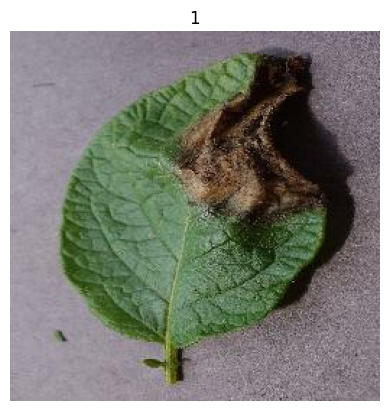

In [ ]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(label_batch[0].numpy())
    plt.axis('off')

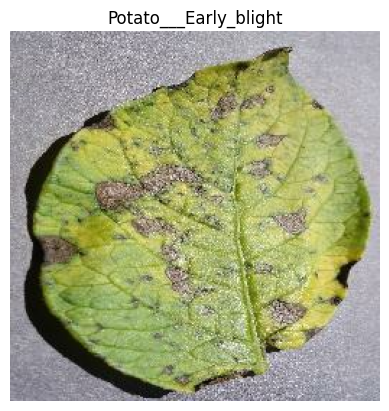

In [ ]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_name[label_batch[0]])
    plt.axis('off')

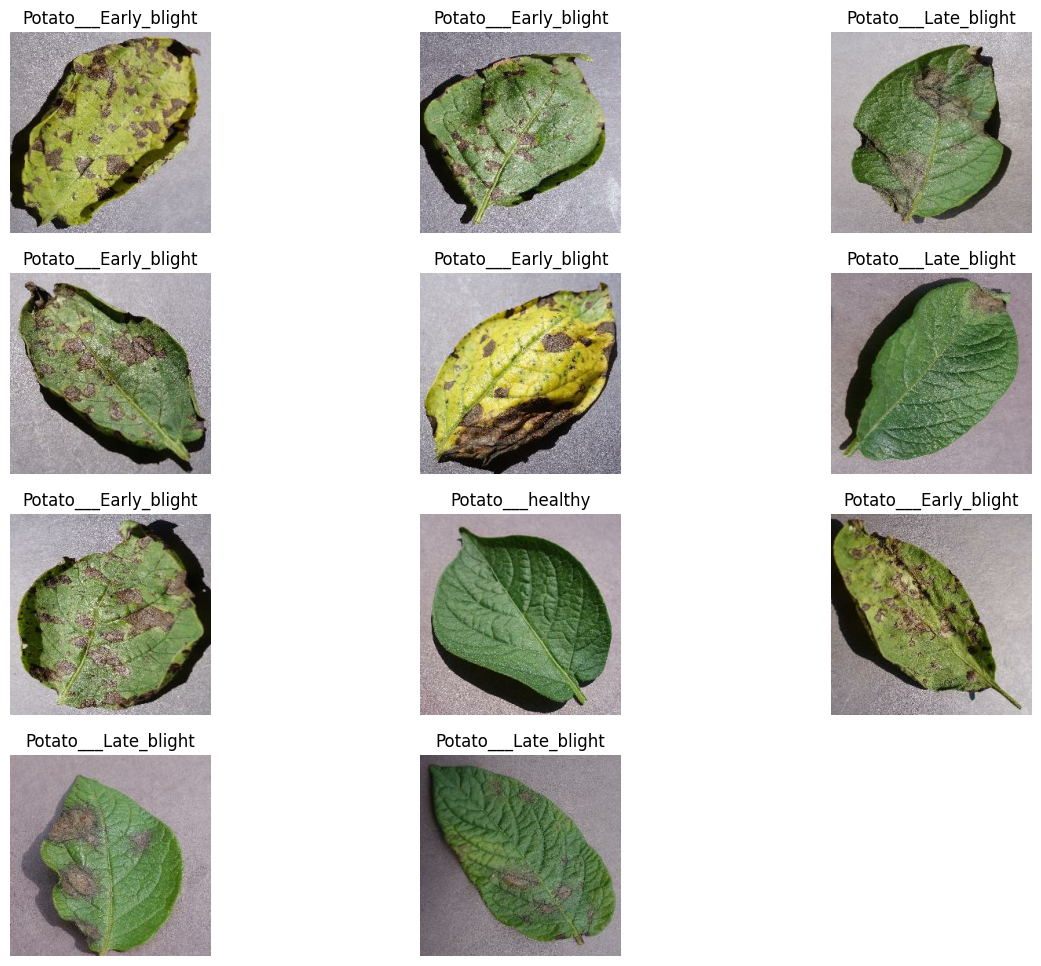

In [ ]:
plt.figure(figsize=(15,12))
for image_batch,label_batch in dataset.take(1):
    for i in range(1,12):
        plt.subplot(4,3,i)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis('off')

In [ ]:
#we have to take 80% as a training
# and 10% for our validation
# and 10% for our test the data
train_size=0.8
len(dataset)*train_size
# means we have to take first 54 batch to make it 80% of data

54.400000000000006

In [ ]:
#take with take first 54 batch
train_ds=dataset.take(54)
len(train_ds)

54

In [ ]:
# skip:skip first 54 batch and take which are remaning
test_ds=dataset.skip(54)
len(test_ds)

14

In [ ]:
#we have to take 10% for validtaation data from test(which we already took 20%)
val_size=0.1
len(dataset)*val_size
# so 6 batch are need to make a val_data

6.800000000000001

In [ ]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [ ]:
#function for split
def get_data_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
    dataset_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*dataset_size)
    validation_size=int(val_split*dataset_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(validation_size)
    test_ds=ds.skip(train_size).skip(validation_size)
    return train_ds,val_ds,test_ds


In [ ]:
train_ds,val_ds,test_ds=get_data_partition(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(test_ds)

8

In [ ]:
len(val_ds)

6

In [ ]:
# cache:Caching the dataset for faster access to data.
# suffle:Shuffling the elements to introduce randomness during training.
# use prefetch(our cpu and gpu should not b)
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
tf

<module 'tensorflow' from '/usr/local/lib/python3.10/dist-packages/tensorflow/__init__.py'>

In [ ]:
image_size=256

In [ ]:
resize_and_rescale =tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmenation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
model=models.Sequential([
    resize_and_rescale,
    data_augmenation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax')

])
model.build(input_shape=(2,256,256,3))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (2, 256, 256, 3)          0         
                                                                 
 sequential_1 (Sequential)   (2, 256, 256, 3)          0         
                                                                 
 conv2d (Conv2D)             (2, 254, 254, 32)         896       
                                                                 
 max_pooling2d (MaxPooling2  (2, 127, 127, 32)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (2, 125, 125, 64)         18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (2, 62, 62, 64)           0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [ ]:
history=model.fit(
    train_ds,
    epochs=50,
    verbose=1,
    validation_data=val_ds
    )

Epoch 1/50
54/54 [==============================] - 227s 4s/step - loss: 0.7873 - accuracy: 0.6001 - val_loss: 0.6075 - val_accuracy: 0.7240
Epoch 2/50
54/54 [==============================] - 235s 4s/step - loss: 0.5126 - accuracy: 0.7668 - val_loss: 0.4728 - val_accuracy: 0.7917
Epoch 3/50
54/54 [==============================] - 231s 4s/step - loss: 0.3778 - accuracy: 0.8455 - val_loss: 0.3668 - val_accuracy: 0.8438
Epoch 4/50
54/54 [==============================] - 236s 4s/step - loss: 0.3280 - accuracy: 0.8628 - val_loss: 0.3406 - val_accuracy: 0.8542
Epoch 5/50
54/54 [==============================] - 230s 4s/step - loss: 0.3124 - accuracy: 0.8738 - val_loss: 0.2609 - val_accuracy: 0.9010
Epoch 6/50
54/54 [==============================] - 227s 4s/step - loss: 0.3564 - accuracy: 0.8409 - val_loss: 0.3131 - val_accuracy: 0.8542
Epoch 7/50
54/54 [==============================] - 229s 4s/step - loss: 0.3144 - accuracy: 0.8727 - val_loss: 0.2917 - val_accuracy: 0.8854
Epoch 8/50
54

In [ ]:
scores=model.evaluate(test_ds)
scores

8/8 [==============================] - 12s 1s/step - loss: 0.0796 - accuracy: 0.9805


[0.07962897419929504, 0.98046875]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.6001157164573669,
 0.7667824029922485,
 0.8454861044883728,
 0.8628472089767456,
 0.8738425970077515,
 0.8408564925193787,
 0.8726851940155029,
 0.8975694179534912,
 0.9253472089767456,
 0.9270833134651184,
 0.9276620149612427,
 0.9380787014961243,
 0.9618055820465088,
 0.9415509104728699,
 0.9525462985038757,
 0.9664351940155029,
 0.9699074029922485,
 0.9756944179534912,
 0.9577546119689941,
 0.9756944179534912,
 0.9733796119689941,
 0.96875,
 0.9641203880310059,
 0.984375,
 0.9866898059844971,
 0.9814814925193787,
 0.9797453880310059,
 0.9855324029922485,
 0.9861111044883728,
 0.9513888955116272,
 0.9785879850387573,
 0.9716435074806213,
 0.9849537014961243,
 0.9866898059844971,
 0.9797453880310059,
 0.9861111044883728,
 0.9855324029922485,
 0.9913194179534912,
 0.9918981194496155,
 0.9907407164573669,
 0.9901620149612427,
 0.9901620149612427,
 0.9942129850387573,
 0.9832175970077515,
 0.9913194179534912,
 0.9924768805503845,
 0.9866898059844971,
 0.9930555820465088,
 0.9832175970

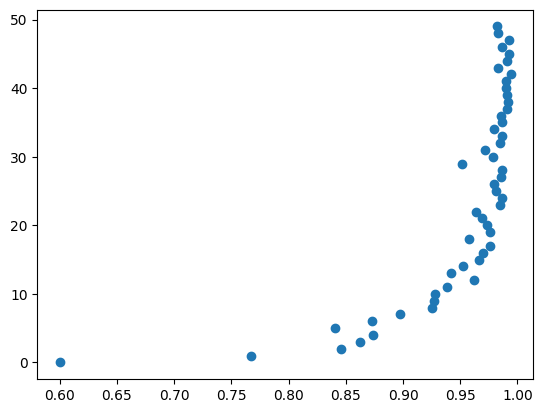

In [ ]:
plt.scatter(x=history.history['accuracy'],y=range(50))

Text(0.5, 1.0, 'training and validation loss')

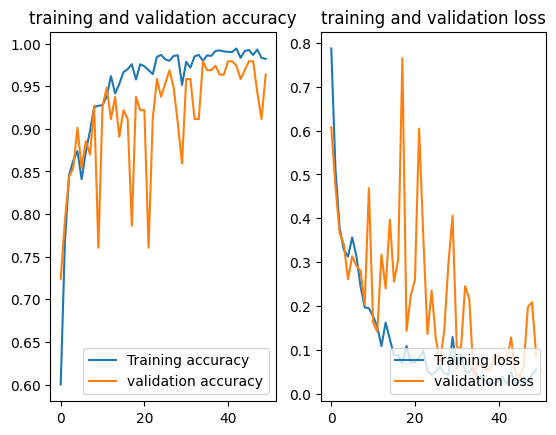

In [ ]:
plt.subplot(1,2,1)
plt.plot(range(50),history.history['accuracy'],label='Training accuracy')
plt.plot(range(50),history.history['val_accuracy'],label='validation accuracy')
plt.legend(loc='lower right')
plt.title("training and validation accuracy")


plt.subplot(1,2,2)
plt.plot(range(50),history.history['loss'],label='Training loss')
plt.plot(range(50),history.history['val_loss'],label='validation loss')
plt.legend(loc='lower right')
plt.title("training and validation loss")

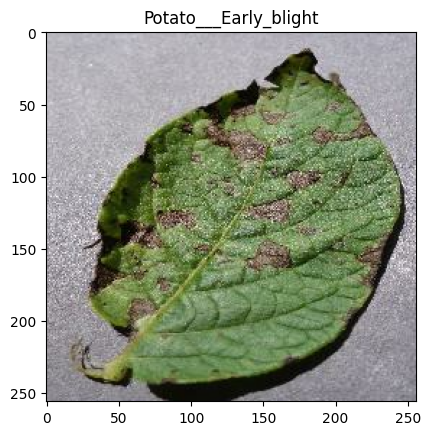

In [ ]:
for image_batch,label_batch in test_ds.take(1):
    plt.imshow(image_batch[31].numpy().astype('uint'))
    plt.title(class_name[label_batch[31].numpy()])

1/1 [==============================] - 4s 4s/step
[9.9975395e-01 2.4610566e-04 3.3375468e-12]
0
predicted is  Potato___Early_blight


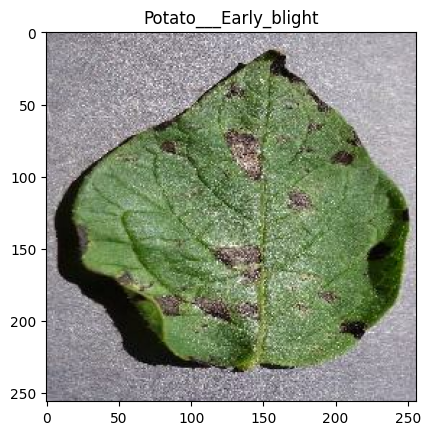

In [ ]:
for image_batch,label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint')
    first_label=label_batch[0].numpy()
    plt.imshow(first_image)
    plt.title(class_name[label_batch[0].numpy()])
    batch_prediction=model.predict(image_batch)
    print(batch_prediction[0])
    print(np.argmax(batch_prediction[0]))
    print("predicted is ",class_name[np.argmax(batch_prediction[0])])

1/1 [==============================] - 3s 3s/step


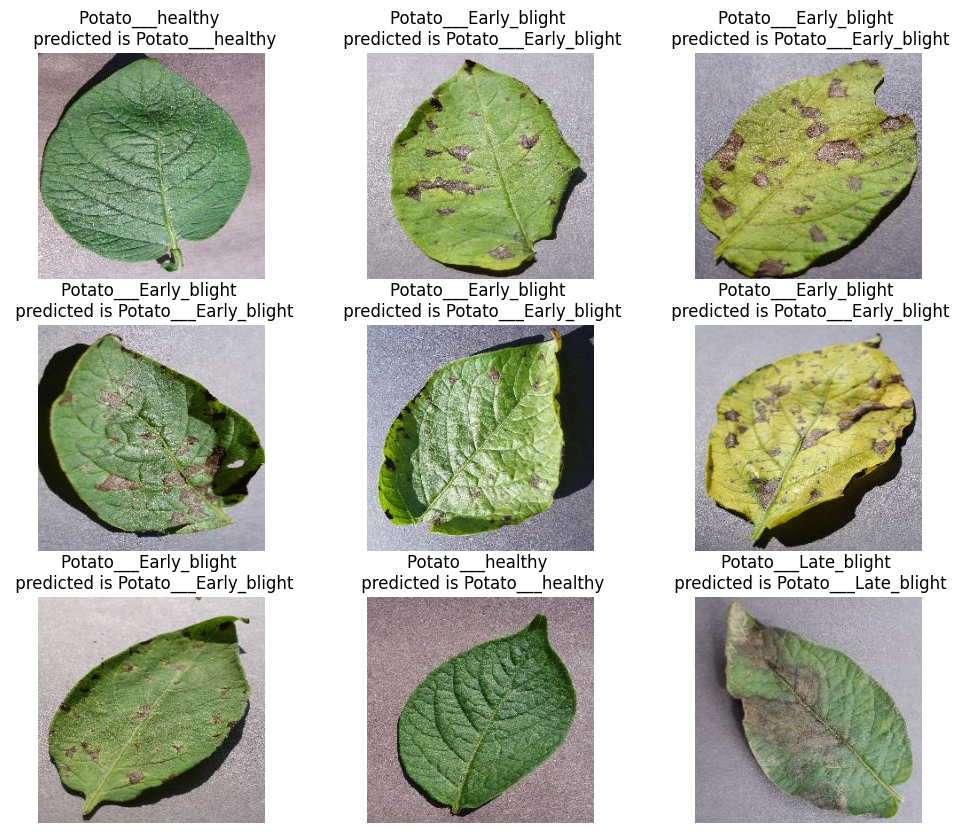

In [ ]:
plt.figure(figsize=(12,10))
for images,labels in test_ds.take(1):
    prediction=model.predict(images)
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint'))
        plt.title(f"{class_name[labels[i].numpy()]} \n predicted is {class_name[np.argmax(prediction[i])]}")
        plt.axis('off')

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Get the image file path from the user
image_path = input("Enter the path to the image file: ")

# Load the image using PIL
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.show()
print(image.size)

In [ ]:
img_array = tf_image.img_to_array(image)
img_array
img_array = np.expand_dims(img_array, axis=0)
predic=model.predict(img_array)
print("predicted leaf is",class_name[np.argmax(predic)])